## Chapter 4
### This notebook and the figures below are made by Yeseul Lee, under the guidance of Steven Skiena.

In [1]:
from scipy import stats
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import xport
from __future__ import division

%matplotlib inline

### Figure 4.1, 4.2, and 4.3
#### The credit goes to here: 
These figures are versions of the reference. I just modified some parts. 
#### References: 
https://nbviewer.jupyter.org/gist/anonymous/17ead8a4f163bdee5d9e General American Population.

https://nbviewer.jupyter.org/gist/anonymous/312a4d546210b400bf4d- Football Players

https://nbviewer.jupyter.org/gist/anonymous/11293af6d82e70caeede- Basket Ball Players

### For Figure 4.1 - BMI of general American population

In [2]:
with xport.XportReader("/home/yeseul/notebook/BMX_H.XPT") as reader:
        Z = [row for row in reader]
Ix = [z.pop("SEQN") for z in Z]
A = pd.DataFrame(Z, index=Ix,columns=['BMXBMI','BMXHT','BMXWT'])

A['ht_m']=(A['BMXHT'])*0.01

normal=A[(A['BMXBMI']>=18.5) & (A['BMXBMI']<=24.9)]
normal=pd.DataFrame(normal)

overweight=A[(A['BMXBMI']>=25) & (A['BMXBMI']<=29.9)]
overweight=pd.DataFrame(overweight)

obese=A[(A['BMXBMI']>=30)]
obese=pd.DataFrame(obese)

### Figure 4.1 - BMI of general American population

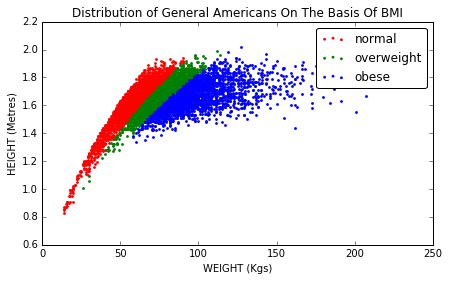

In [3]:
opacity = 1
dotsize = 8

ax=normal.plot(kind='scatter', x='BMXWT', y='ht_m',c='r',s=dotsize, figsize=(7,4),alpha=opacity, linewidth='0.0')         
overweight.plot(kind='scatter',x='BMXWT',y='ht_m',ax=ax,c='g',s=dotsize, alpha=opacity, linewidth='0.0')
obese.plot(kind='scatter',x='BMXWT',y='ht_m',ax=ax,c='b',s=dotsize, alpha=opacity, linewidth='0.0')
ax.set_xlabel('WEIGHT (Kgs)')
ax.set_ylabel('HEIGHT (Metres)')
ax.set_title('Distribution of General Americans On The Basis Of BMI')
ax.legend(['normal','overweight','obese'],loc='upper right',fancybox=True)

### For Figure 4.2 Left and 4.3 Left - Basketball players

In [4]:
#For basketball players
path = "/home/yeseul/notebook/nba_ht_wt.xls"
csv_data = pd.ExcelFile(path).parse('Sheet1')
BMI_table=df = pd.DataFrame(data = csv_data, columns=['Player','Height','Weight','Pos'])
BMI_table['sq_height']=pd.to_numeric(BMI_table['Height'])
BMI_table['sq_height']=BMI_table['sq_height']**2
BMI_table['BMI']=(BMI_table['Weight']/BMI_table['sq_height'])*703
BMI_table['ht_m']=(BMI_table['Height'])*0.0254
BMI_table['wt_kgs']=(BMI_table['Weight'])*0.45

normal=BMI_table[(BMI_table['BMI']>=18.5) & (BMI_table['BMI']<=24.9)]
normal=pd.DataFrame(normal)
overweight=BMI_table[(BMI_table['BMI']>=25) & (BMI_table['BMI']<=29.9)]
overweight=pd.DataFrame(overweight)
obese=BMI_table[(BMI_table['BMI']>=30)]
obese=pd.DataFrame(obese)

### Figure 4.2 Left - Basketball players

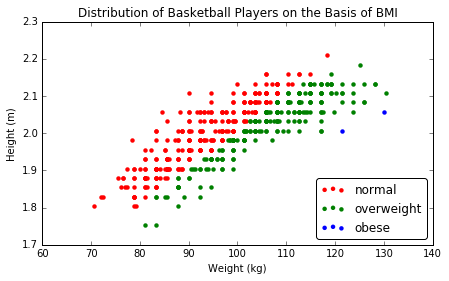

In [5]:
dotsize=20
ax=normal.plot(kind='scatter', x='wt_kgs', y='ht_m',c='r',s=dotsize,figsize=(7,4),alpha=1, linewidth='0.0')

overweight.plot(kind='scatter',x='wt_kgs',y='ht_m',ax=ax,c='g',s=dotsize,alpha=1, linewidth='0.0')
obese.plot(kind='scatter',x='wt_kgs',y='ht_m',ax=ax,c='b',s=dotsize,alpha=1, linewidth='0.0')
ax.legend(['normal','overweight','obese'],loc='lower right',fancybox=True)
ax.set_xlabel('Weight (kg)')
ax.set_ylabel('Height (m)')
ax.set_title('Distribution of Basketball Players on the Basis of BMI')

### For Figure 4.3 Left - Basketball players by position

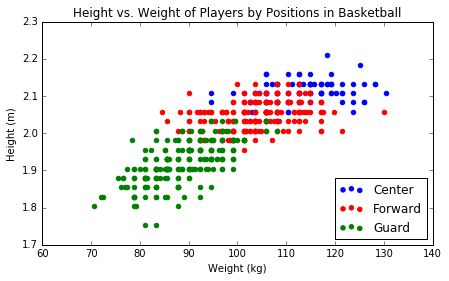

In [6]:
df=BMI_table

plt.figure(figsize=(7,4))

plt.scatter(df['wt_kgs'][df['Pos'] == 'C'],df['ht_m'][df['Pos'] == 'C'],
            marker='o',color='b',alpha=1,s = 20,label='Center')
plt.scatter(df['wt_kgs'][df['Pos'] == 'F'],df['ht_m'][df['Pos'] == 'F'],
            marker='o',color='r',alpha=1,s = 20,label='Forward')
plt.scatter(df['wt_kgs'][df['Pos'] == 'G'],df['ht_m'][df['Pos'] == 'G'],
            marker='o',color='g',alpha=1,s = 20,label='Guard')

plt.title('Height vs. Weight of Players by Positions in Basketball')
plt.ylabel('Height (m)')
plt.xlabel('Weight (kg)')
plt.legend(loc='lower right')

### For Figure 4.2 Right and 4.3 Right - Football players

In [7]:
path = "/home/yeseul/notebook/nfl_height_weight.csv"
csv_data = pd.read_csv(path)
BMI_table=df = pd.DataFrame(data = csv_data, columns=['full_name', 'height_in_inches','weight_in_lbs','date_of_birth','position','team'])
BMI_table['sq_height']=pd.to_numeric(BMI_table['height_in_inches'])
BMI_table['sq_height']=BMI_table['sq_height']**2
BMI_table['BMI']=(BMI_table['weight_in_lbs']/BMI_table['sq_height'])*703
BMI_table['ht_m']=BMI_table['height_in_inches']*0.025
BMI_table['wt_kg']=BMI_table['weight_in_lbs']*0.45

normal=BMI_table[(BMI_table['BMI']>=18.5) & (BMI_table['BMI']<=24.9)]
normal=pd.DataFrame(normal)
overweight=BMI_table[(BMI_table['BMI']>=25) & (BMI_table['BMI']<=29.9)]
overweight=pd.DataFrame(overweight)
obese=BMI_table[(BMI_table['BMI']>=30)]
obese=pd.DataFrame(obese)


### Figure 4.2 Right - Football players

(64.25, 171.55000000000001)

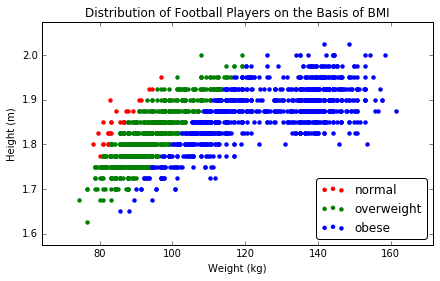

In [8]:
#Ch.4
dotsize=20
ax=normal.plot(kind='scatter', x='wt_kg', y='ht_m',c='r',s=dotsize,figsize=(7,4),alpha=1, linewidth='0.0')
overweight.plot(kind='scatter',x='wt_kg',y='ht_m',ax=ax,c='g',s=dotsize,alpha=1, linewidth='0.0')
obese.plot(kind='scatter',x='wt_kg',y='ht_m',ax=ax,c='b',s=dotsize,alpha=1, linewidth='0.0')
ax.set_xlabel('Weight (kg)')
ax.set_ylabel('Height (m)')
ax.set_title('Distribution of Football Players on the Basis of BMI')
ax.legend(['normal','overweight','obese'],loc='lower right',fancybox=True)
ax.set_ylim(min(BMI_table['ht_m']) - 0.05, max(BMI_table['ht_m']) + 0.05)
ax.set_xlim(min(BMI_table['wt_kg']) - 10,max(BMI_table['wt_kg']) + 10)

### Figure 4.3 Right - Football players by position

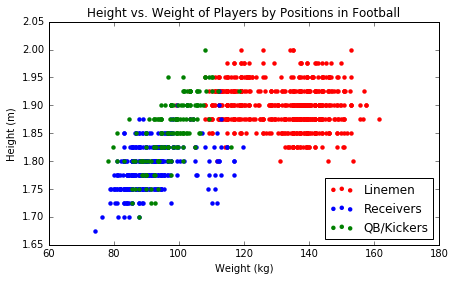

In [9]:
liner = BMI_table[(BMI_table['position'] == 'C') | (BMI_table['position'] == 'G') | \
                 (BMI_table['position'] == 'OG') | (BMI_table['position'] == 'OT') | \
                 (BMI_table['position'] == 'TE') | \
                 (BMI_table['position'] == 'DE') | (BMI_table['position'] == 'DT') | \
                 (BMI_table['position'] == 'NT')]
backs = BMI_table[(BMI_table['position'] == 'FB') | (BMI_table['position'] == 'CB') | \
                 (BMI_table['position'] == 'DB') | (BMI_table['position'] == 'FS') | \
                 (BMI_table['position'] == 'SAF') | (BMI_table['position'] == 'SS')]
special = BMI_table[(BMI_table['position'] == 'K') | (BMI_table['position'] == 'QB') |\
                    (BMI_table['position'] == 'P')]

ax = liner.plot(kind='scatter', x='wt_kg', y='ht_m', c='r', s = 20, linewidth='0.0', figsize=(7,4))
backs.plot(kind='scatter', x='wt_kg', y='ht_m', c='b', s = 20, linewidth='0.0', ax=ax)
special.plot(kind='scatter', x='wt_kg', y='ht_m', c='g', s = 20, linewidth='0.0', ax=ax)
ax.legend(['Linemen', 'Receivers', 'QB/Kickers'], loc = 'lower right')
ax.set_title("Height vs. Weight of Players by Positions in Football")
ax.set_xlabel("Weight (kg)")
ax.set_ylabel("Height (m)")

### Figure 4.5

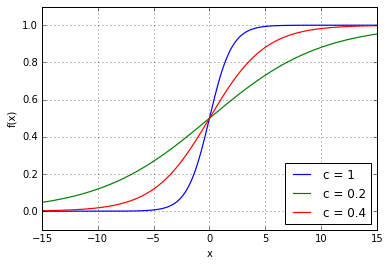

In [10]:
c = 1
x = np.linspace(-15, 15, 400)
y = 1/(1+np.exp(-1*c*x))
c = 0.2
y2 = 1/(1+np.exp(-1*c*x))
c = 0.4
y3 = 1/(1+np.exp(-1*c*x))

plt.plot(x,y, linewidth=1.2, label="c = 1")
plt.plot(x, y2, linewidth=1.2, label="c = 0.2")
plt.plot(x, y3, linewidth=1.2, label="c = 0.4")

plt.ylim(-0.1, 1.1)
plt.grid()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend(loc="lower right")

### Figure 4.8

(-3.5, 3.5)

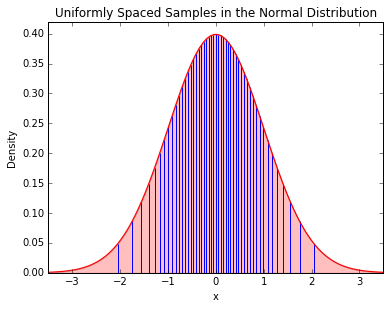

In [11]:
plt.figure(figsize=(6,4.5))

x = np.linspace(stats.norm.ppf(0.0001), stats.norm.ppf(0.9999), 100)
plt.plot(x, stats.norm.pdf(x), 'r-', linewidth=1.2)
plt.fill_between(x, stats.norm.pdf(x), facecolor='red', alpha=0.25)

n=50
j=0.0
i = 1/float(n)

while j < 1:
    j = j + i
    x_value = stats.norm.ppf(j)
    plt.vlines(x_value, 0, stats.norm.pdf(stats.norm.ppf(j)), color='blue') 
    
plt.xlabel('x')
plt.ylabel('Density')
plt.title("Uniformly Spaced Samples in the Normal Distribution")
plt.ylim(0,0.42)
plt.xlim(-3.5, 3.5)